In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
titanic_data=pd.read_csv("D:\\Downloads\\train.csv.zip", encoding='windows-1251', sep=',')
titanic_data

PassengerId  Survived  Pclass                Name     Sex    Age  \
0                0         1       1    Oconnor, Frankie    male    NaN   
1                1         0       3         Bryan, Drew    male    NaN   
2                2         0       3      Owens, Kenneth    male   0.33   
3                3         0       3       Kramer, James    male  19.00   
4                4         1       3       Bond, Michael    male  25.00   
...            ...       ...     ...                 ...     ...    ...   
99995        99995         1       2         Bell, Adele  female  62.00   
99996        99996         0       2       Brown, Herman    male  66.00   
99997        99997         0       3  Childress, Charles    male  37.00   
99998        99998         0       3    Caughlin, Thomas    male  51.00   
99999        99999         0       3       Enciso, Tyler    male  55.00   

       SibSp  Parch     Ticket   Fare   Cabin Embarked  
0          2      0     209245  27.14  C12239        S  
1          0      0      27323  13.35     NaN        S  
2          1      2  CA 457703  71.29     NaN        S  
3          0      0   A. 10866  13.04     NaN        S  
4          0      0     427635   7.76     NaN        S  
...      ...    ...        ...    ...     ...      ...  
99995      0      0   PC 15008  14.86  D17243        C  
99996      0      0      13273  11.15     NaN        S  
99997      0      0        NaN   9.95     NaN        S  
99998      0      1     458654  30.92     NaN        S  
99999      0      0     458074  13.96     NaN        S  

[100000 rows x 12 columns]

In [98]:
titanic_data.shape

(100000, 14)

In [3]:
survivals_mean=titanic_data.Survived.mean()
survivals_mean

0.42774

Survived  number  percentage
0         0   57226     0.57226
1         1   42774     0.42774

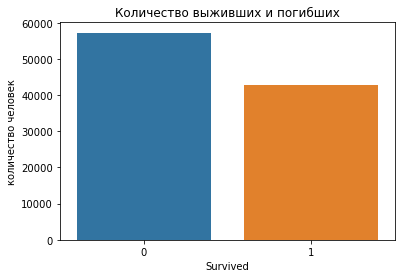

In [100]:
survived=titanic_data.groupby('Survived', as_index=False).agg({'PassengerId':'count'}).rename(columns={'PassengerId':'number'})
plt.title("Количество выживших и погибших")
sns.barplot(x=survived.Survived, y=survived['number'])
plt.ylabel("количество человек")
survived['percentage']=survived.number/100000
survived

Pclass  all_number
0       1       30315
1       2       28679
2       3       41006

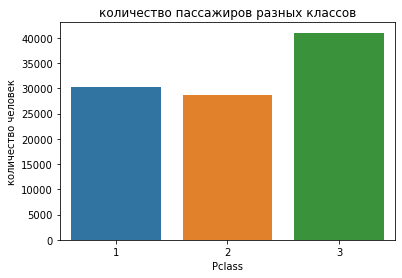

In [5]:
classes=titanic_data.groupby('Pclass', as_index=False).agg({'PassengerId':'count'}).rename(columns={'PassengerId':'all_number'})
plt.title("количество пассажиров разных классов")
sns.barplot(x=classes.Pclass, y=classes['all_number'])
plt.ylabel("количество человек")
classes

Pclass  Survived  all_number  percentage_survive
0       1     17576       30315            0.579779
1       2     15057       28679            0.525018
2       3     10141       41006            0.247305

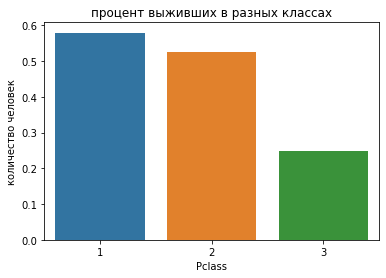

In [54]:
classes_survived=titanic_data.groupby('Pclass', as_index=False).agg({'Survived':'sum'})
classes_survived=classes_survived.merge(classes,on='Pclass')
classes_survived['percentage_survive']=classes_survived.Survived/classes_survived.all_number
plt.title("процент выживших в разных классах")
sns.barplot(x=classes_survived.Pclass, y=classes_survived['percentage_survive'])
plt.ylabel("количество человек")
classes_survived

Sex  Survived  number  total  percentage
0  female         0   12660  43886    0.288475
1  female         1   31226  43886    0.711525
2    male         0   44566  56114    0.794205
3    male         1   11548  56114    0.205795

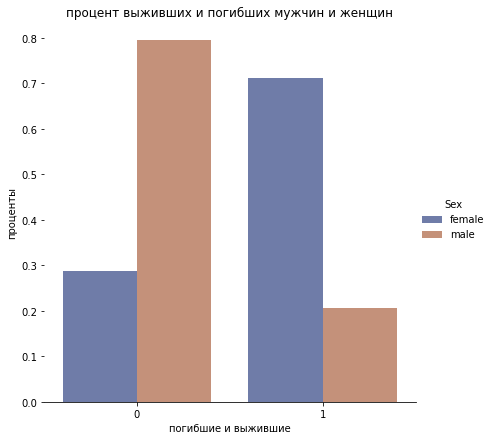

In [55]:
sex=titanic_data.groupby(['Sex'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
sex_survived=titanic_data.groupby(['Sex','Survived'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
sex_survived=sex_survived.merge(sex, on='Sex').rename(columns={'number_x':'number', 'number_y':'total'})
sex_survived['percentage']=sex_survived.number/sex_survived.total
sex_survived
g = sns.catplot(
    data=sex_survived, kind="bar",
    x="Survived", y="percentage", hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("погибшие и выжившие", "проценты")
plt.title("процент выживших и погибших мужчин и женщин")
sex_survived

Age  number
0     0.08      39
1     0.17      67
2     0.25      68
3     0.33      53
4     0.42      62
..     ...     ...
169  83.00       9
170  84.00       3
171  85.00       4
172  86.00       2
173  87.00       1

[174 rows x 2 columns]

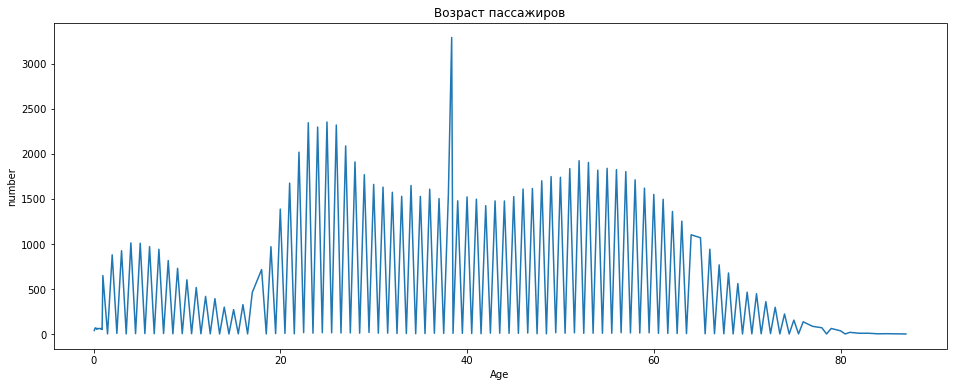

In [56]:
titanic_age=titanic_data.groupby('Age', as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
titanic_age
plt.figure(figsize=(16,6))
plt.title("Возраст пассажиров")
sns.lineplot(data=titanic_age, x="Age", y="number")
titanic_age

In [9]:
#замещение NaN в 'Age' средним значением
titanic_data.Age=titanic_data.Age.fillna(titanic_data.Age.mean())

In [57]:
age_mean=titanic_data.Age.mean()
age_mean

38.35547214294454

Survived        Age
0         0  36.764407
1         1  40.484109

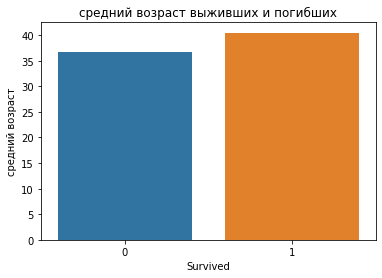

In [58]:
average_age=titanic_data.groupby('Survived',as_index=False).agg({'Age':'mean'})
plt.title("средний возраст выживших и погибших")
sns.barplot(x=average_age.Survived, y=average_age['Age'])
plt.ylabel("средний возраст")
average_age

Sex  Survived   mean_age
0  female         0  37.053949
1  female         1  41.182579
2    male         0  36.682155
3    male         1  38.595433

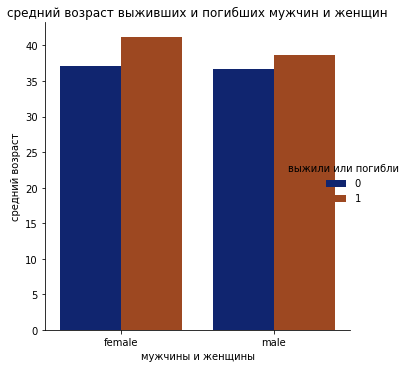

In [59]:
age_sex=titanic_data.groupby(['Sex', 'Survived'], as_index=False).agg({'Age':'mean'}).rename(columns={'Age':'mean_age'})
g1 = sns.catplot(
    data=age_sex, kind="bar",
    x="Sex", y="mean_age", hue="Survived",
    palette="dark"
)
g1.set_axis_labels("мужчины и женщины", "средний возраст")
g1.legend.set_title("выжили или погибли")
plt.title("средний возраст выживших и погибших мужчин и женщин")
age_sex

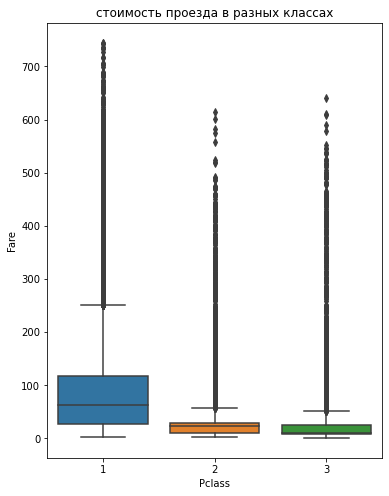

In [107]:

plt.figure(figsize=(6,8))
plt.title("стоимость проезда в разных классах") 
ax = sns.boxplot(x="Pclass", y="Fare", data=titanic_data)


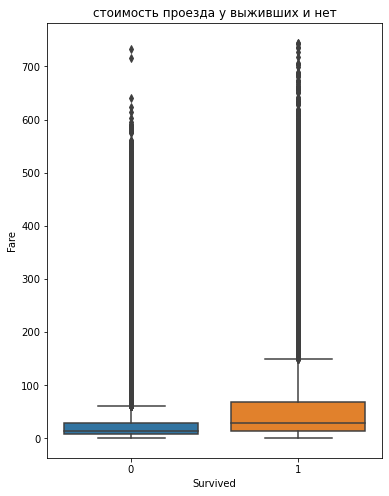

In [109]:
plt.figure(figsize=(6,8))
plt.title("стоимость проезда у выживших и нет") 
ax = sns.boxplot(x="Survived", y="Fare", data=titanic_data)

In [13]:
def child(a):
    if a<18:
        return 'child'
    else:
        return 'adult'    
titanic_data['who']=titanic_data.Age.apply(child)


Pclass    who  total  survived  percentage_survival
0       1  adult  29233     17080             0.584271
1       1  child   1082       496             0.458410
2       2  adult  24642     12675             0.514366
3       2  child   4037      2382             0.590042
4       3  adult  34208      7807             0.228221
5       3  child   6798      2334             0.343336

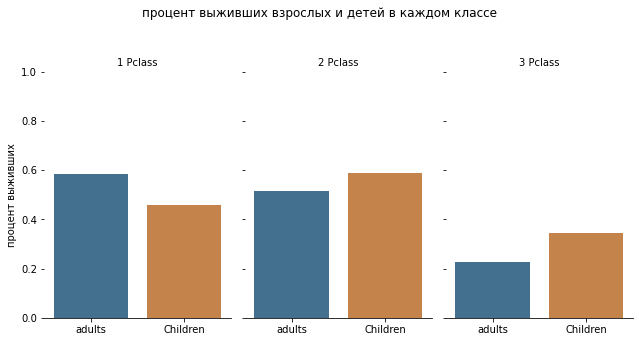

In [60]:
total_classes_who=titanic_data.groupby(['Pclass', 'who'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'total'})
survived_classes_who=titanic_data.query('Survived==1').groupby(['Pclass', 'who'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'survived'})
classes_who=total_classes_who.merge(survived_classes_who)
classes_who['percentage_survival']=classes_who.survived/classes_who.total
classes_who

g2 = sns.catplot(x="who", y="percentage_survival", col="Pclass",
                data=classes_who, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g2.set_axis_labels("", "процент выживших")
  .set_xticklabels(["adults", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True)) 
g2.fig.subplots_adjust(top=.8)
g2.fig.suptitle('процент выживших взрослых и детей в каждом классе')
classes_who

Pclass  whoFMC  total  survived  percentage_survival
0       1   child   1082       496             0.458410
1       1  female  15609     12058             0.772503
2       1    male  13624      5022             0.368614
3       2   child   4037      2382             0.590042
4       2  female  12538      9739             0.776759
5       2    male  12104      2936             0.242564
6       3   child   6798      2334             0.343336
7       3  female   9175      5331             0.581035
8       3    male  25033      2476             0.098909

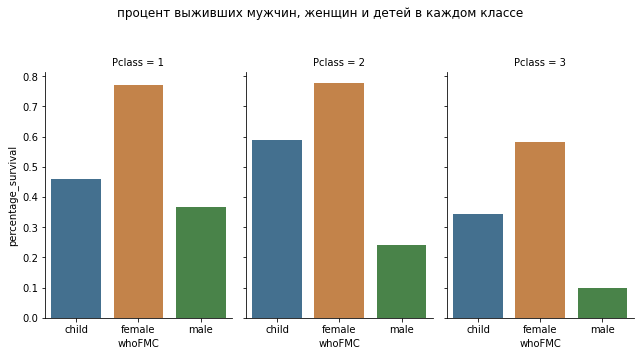

In [61]:
titanic_data['whoFMC']=titanic_data.query('who=="adult"').Sex
titanic_data['whoFMC'].fillna('child', inplace=True)

total_classes_whoFMC=titanic_data.groupby(['Pclass', 'whoFMC'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'total'})
survived_classes_whoFMC=titanic_data.query('Survived==1').groupby(['Pclass', 'whoFMC'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'survived'})
classes_whoFMC=total_classes_whoFMC.merge(survived_classes_whoFMC)
classes_whoFMC['percentage_survival']=classes_whoFMC.survived/classes_whoFMC.total


g3 = sns.catplot(x="whoFMC", y="percentage_survival", col="Pclass",
               data=classes_whoFMC, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g3.fig.subplots_adjust(top=.8)
g3.fig.suptitle('процент выживших мужчин, женщин и детей в каждом классе')
classes_whoFMC

SibSp  number
0      0   73308
1      1   19758
2      2    3703
3      3    1635
4      4    1168
5      5     132
6      8     296

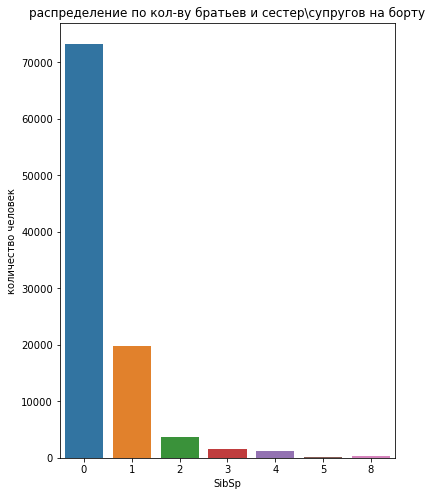

In [62]:
sb_sp_total=titanic_data.groupby('SibSp', as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
plt.figure(figsize=(6,8))
plt.title("распределение по кол-ву братьев и сестер\супругов на борту")
sns.barplot(x=sb_sp_total.SibSp, y=sb_sp_total.number)
plt.ylabel("количество человек")
sb_sp_total

SibSp  total  Survived  number  percentage
0       0  73308         0   42017    0.573157
1       0  73308         1   31291    0.426843
2       1  19758         0   11188    0.566252
3       1  19758         1    8570    0.433748
4       2   3703         0    2022    0.546044
5       2   3703         1    1681    0.453956
6       3   1635         0     981    0.600000
7       3   1635         1     654    0.400000
8       4   1168         0     729    0.624144
9       4   1168         1     439    0.375856
10      5    132         0     107    0.810606
11      5    132         1      25    0.189394
12      8    296         0     182    0.614865
13      8    296         1     114    0.385135

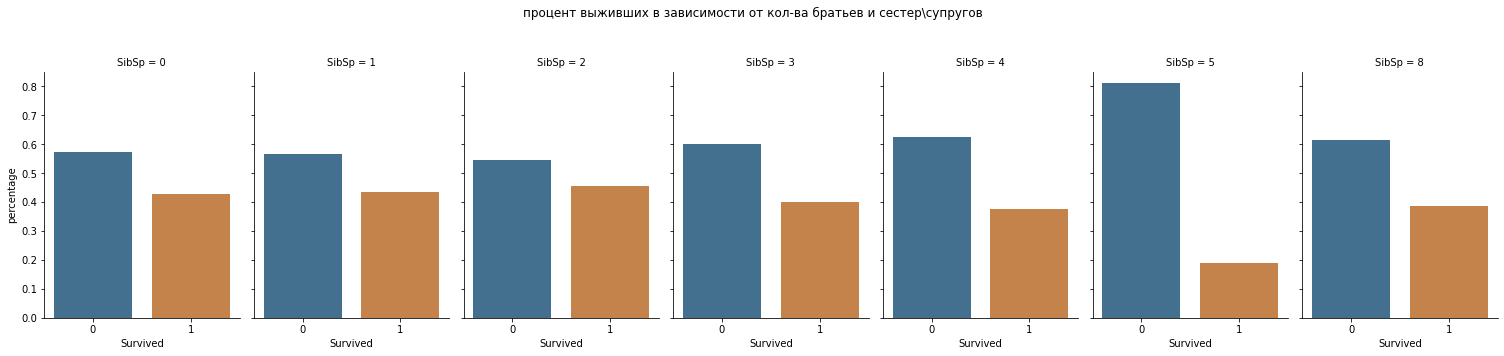

In [74]:
sb_sp=titanic_data.groupby(['SibSp','Survived'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
sb_sp=sb_sp_total.merge(sb_sp, on='SibSp').rename(columns={'number_x':'total', 'number_y':'number'})
sb_sp['percentage']=sb_sp.number/sb_sp.total
g4 = sns.catplot(x="Survived", y="percentage", col="SibSp",
               data=sb_sp, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g4.fig.subplots_adjust(top=.8)
g4.fig.suptitle('процент выживших в зависимости от кол-ва братьев и сестер\супругов')
sb_sp

Parch  number
0      0   73540
1      1   12996
2      2   11236
3      3     983
4      4     446
5      5     331
6      6     204
7      9     264

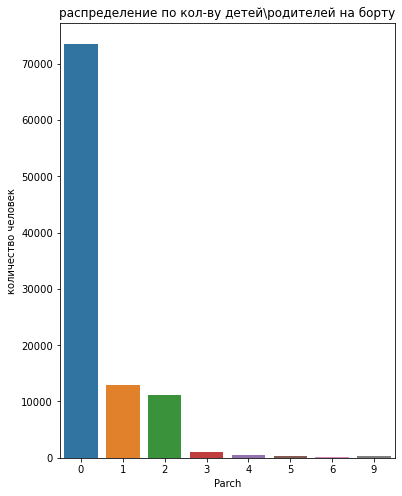

In [64]:
pa_ch_total=titanic_data.groupby('Parch', as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
plt.figure(figsize=(6,8))
plt.title("распределение по кол-ву детей\родителей на борту")
sns.barplot(x=pa_ch_total.Parch, y=pa_ch_total.number)
plt.ylabel("количество человек")
pa_ch_total

Parch  total  Survived  number  percentage
0       0  73540         0   43741    0.594792
1       0  73540         1   29799    0.405208
2       1  12996         0    5302    0.407972
3       1  12996         1    7694    0.592028
4       2  11236         0    6913    0.615255
5       2  11236         1    4323    0.384745
6       3    983         0     499    0.507630
7       3    983         1     484    0.492370
8       4    446         0     319    0.715247
9       4    446         1     127    0.284753
10      5    331         0     142    0.429003
11      5    331         1     189    0.570997
12      6    204         0     162    0.794118
13      6    204         1      42    0.205882
14      9    264         0     148    0.560606
15      9    264         1     116    0.439394

<Figure size 1296x720 with 0 Axes>

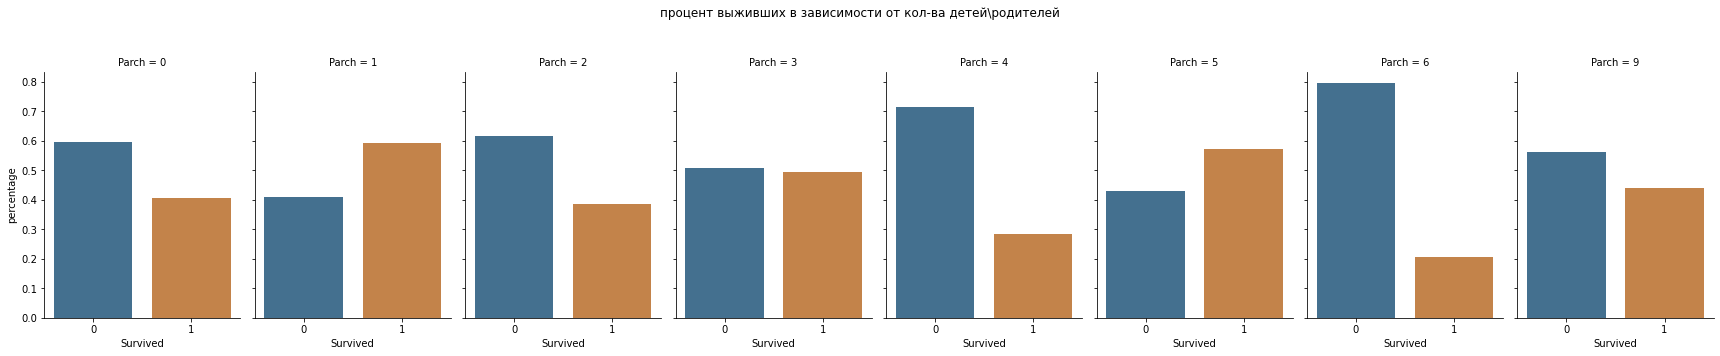

In [65]:
pa_ch=titanic_data.groupby(['Parch','Survived'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'number'})
pa_ch=pa_ch_total.merge(pa_ch, on='Parch').rename(columns={'number_x':'total', 'number_y':'number'})
pa_ch['percentage']=pa_ch.number/pa_ch.total
plt.figure(figsize=(18,10))
g4 = sns.catplot(x="Survived", y="percentage", col="Parch",
               data=pa_ch, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g4.fig.subplots_adjust(top=.8)
g4.fig.suptitle('процент выживших в зависимости от кол-ва детей\родителей')
pa_ch

In [20]:
fare_mean=titanic_data.Fare.mean()
fare_mean

43.92933040273962

Fare  count
15934  744.66      1
15933  744.46      1
15932  742.13      1
15931  735.70      1
15930  735.48      1
...       ...    ...
4        1.51      1
3        1.41      1
2        1.28      1
1        0.99      1
0        0.68      1

[15935 rows x 2 columns]

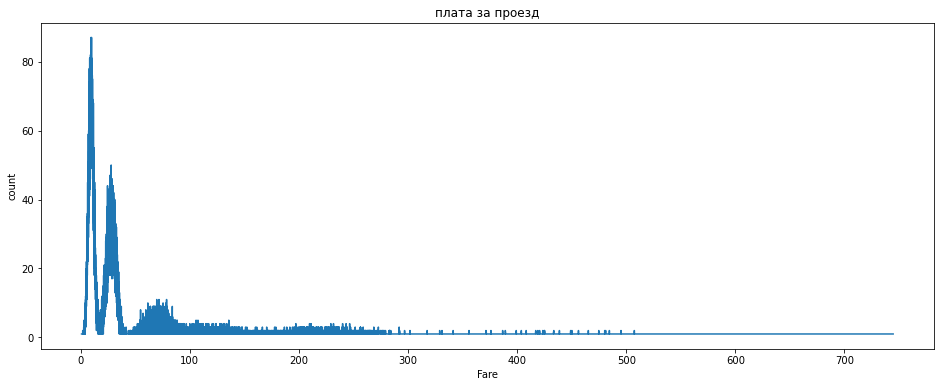

In [66]:
fare=titanic_data.groupby('Fare', as_index=False).agg({'PassengerId':'count'})\
    .sort_values('Fare', ascending=False)\
    .rename(columns={'PassengerId':'count'})
plt.figure(figsize=(16,6))
plt.title("плата за проезд")
sns.lineplot(data=fare, x="Fare", y="count")
fare

Pclass       Fare
0       1  92.653113
1       2  25.756003
2       3  20.618226

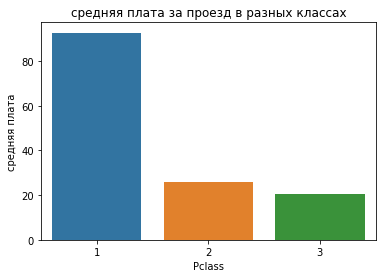

In [67]:
mean_fare=titanic_data.groupby('Pclass', as_index=False).agg({'Fare':'mean'})
plt.title("средняя плата за проезд в разных классах")
sns.barplot(x=mean_fare.Pclass, y=mean_fare.Fare)
plt.ylabel("средняя плата")
mean_fare

letter  Survived  count  total  percentage
0       A         0   4575   6307    0.725384
1       A         1   1732   6307    0.274616
2       B         0   2751   7439    0.369808
3       B         1   4688   7439    0.630192
4       C         0   3403  11825    0.287780
5       C         1   8422  11825    0.712220
6       D         0    974   3637    0.267803
7       D         1   2663   3637    0.732197
8       E         0    669   1749    0.382504
9       E         1   1080   1749    0.617496
10      F         0    108    663    0.162896
11      F         1    555    663    0.837104
12      G         0     79    482    0.163900
13      G         1    403    482    0.836100
14      T         0     18     32    0.562500
15      T         1     14     32    0.437500

<Figure size 1296x720 with 0 Axes>

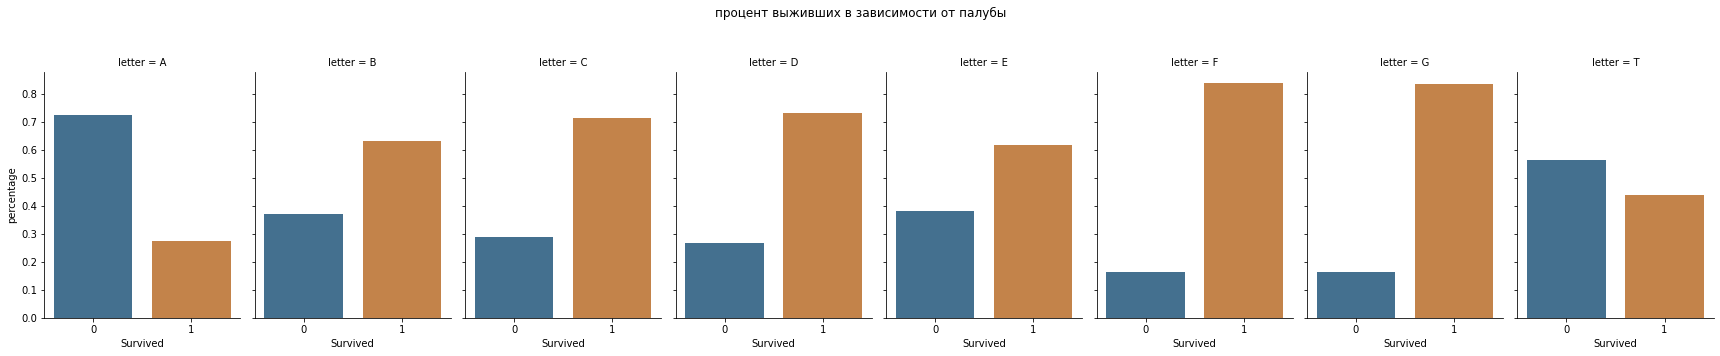

In [68]:
#удалили NaN в колонке Cabin
cabin_new=titanic_data.dropna(subset = ['Cabin'])
#из названия каюты выделили первую букву в колонку letter, она обозначает номер палубы, А вверху, G- внизу
cabin_new=cabin_new['Cabin'].apply(lambda x:list(x)[0]).to_frame().merge(cabin_new, left_index=True, right_index=True)\
    .rename(columns={'Cabin_x':'letter'})
cabin_new_survived=cabin_new.groupby(['letter','Survived'], as_index=False).agg({'PassengerId':'count'})
cabin_new_total=cabin_new.groupby('letter', as_index=False).agg({'PassengerId':'count'})
cabin_new_survived=cabin_new_survived.merge(cabin_new_total, on='letter')\
    .rename(columns={'PassengerId_x':'count', 'PassengerId_y':'total'})
cabin_new_survived['percentage']=cabin_new_survived['count']/cabin_new_survived.total
plt.figure(figsize=(18,10))
g5 = sns.catplot(x="Survived", y="percentage", col="letter",
               data=cabin_new_survived, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g5.fig.subplots_adjust(top=.8)
g5.fig.suptitle('процент выживших в зависимости от палубы')
cabin_new_survived

<AxesSubplot:title={'center':'зависимость платы и возраста'}, xlabel='Age', ylabel='Fare'>

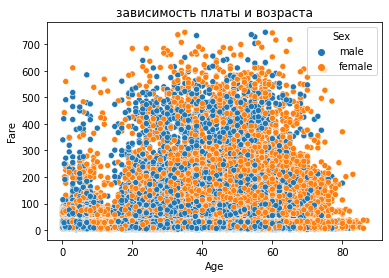

In [40]:
plt.title("зависимость платы и возраста") 
sns.scatterplot(data=titanic_data, x="Age", y="Fare", hue="Sex")


<Figure size 720x1152 with 0 Axes>

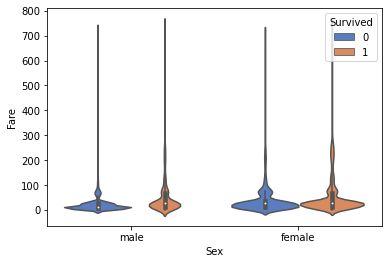

<Figure size 720x1152 with 0 Axes>

In [39]:
plt.title("") 
ax = sns.violinplot(x="Sex", y="Fare", hue="Survived",
                    data=titanic_data, palette="muted")
plt.figure(figsize=(10,16))

Embarked  total  Survived  count  percentage
0        C  22187         0   5518    0.248704
1        C  22187         1  16669    0.751296
2        Q   5424         0   2186    0.403024
3        Q   5424         1   3238    0.596976
4        S  72139         0  49394    0.684706
5        S  72139         1  22745    0.315294

<Figure size 1296x720 with 0 Axes>

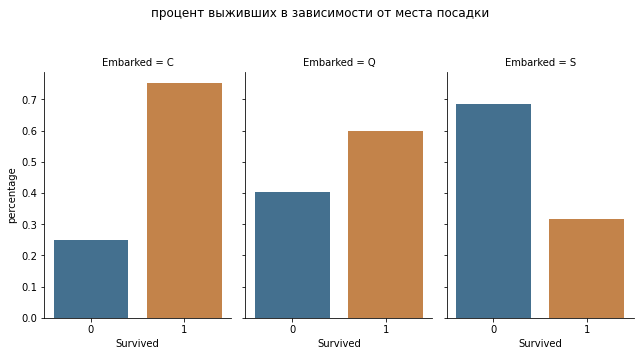

In [70]:
emb_total=titanic_data.groupby('Embarked', as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'total'})
emb_sur=titanic_data.groupby(['Embarked','Survived'], as_index=False).agg({'PassengerId':'count'})\
    .rename(columns={'PassengerId':'count'})
emb_sur=emb_total.merge(emb_sur, on='Embarked')
emb_sur["percentage"]=emb_sur['count']/emb_sur.total
plt.figure(figsize=(18,10))
g7 = sns.catplot(x="Survived", y="percentage", col="Embarked",
               data=emb_sur, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g7.fig.subplots_adjust(top=.8)
g7.fig.suptitle('процент выживших в зависимости от места посадки')
emb_sur

Text(0, 0.5, 'средняя плата')

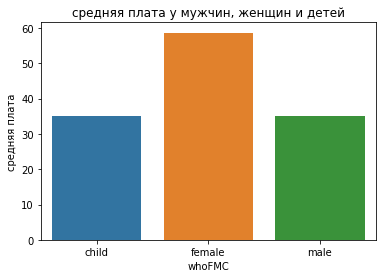

In [73]:
mean_fare=titanic_data.groupby('whoFMC', as_index=False).agg({'Fare':'mean'})
plt.title("средняя плата у мужчин, женщин и детей")
sns.barplot(x=mean_fare.whoFMC, y=mean_fare['Fare'])
plt.ylabel("средняя плата")

Text(0.5, 0.98, 'количество людей разных классов в зависимости от места посадки')

<Figure size 1296x720 with 0 Axes>

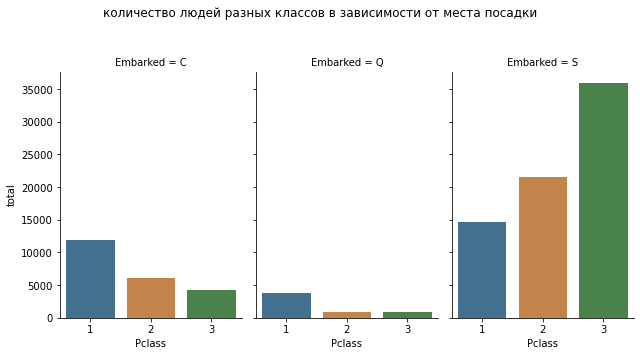

In [97]:
class_emb=titanic_data.groupby(['Pclass','Embarked'], as_index=False).agg({'PassengerId':'count'}).rename(columns={'PassengerId':'total'})
plt.figure(figsize=(18,10))
g8 = sns.catplot(x="Pclass", y="total", col="Embarked",
               data=class_emb, saturation=.5,
               kind="bar", ci=None, aspect=.6)
g8.fig.subplots_adjust(top=.8)
g8.fig.suptitle('количество людей разных классов в зависимости от места посадки')



In [25]:
titanic_data

PassengerId  Survived  Pclass                Name     Sex        Age  \
0                0         1       1    Oconnor, Frankie    male  38.355472   
1                1         0       3         Bryan, Drew    male  38.355472   
2                2         0       3      Owens, Kenneth    male   0.330000   
3                3         0       3       Kramer, James    male  19.000000   
4                4         1       3       Bond, Michael    male  25.000000   
...            ...       ...     ...                 ...     ...        ...   
99995        99995         1       2         Bell, Adele  female  62.000000   
99996        99996         0       2       Brown, Herman    male  66.000000   
99997        99997         0       3  Childress, Charles    male  37.000000   
99998        99998         0       3    Caughlin, Thomas    male  51.000000   
99999        99999         0       3       Enciso, Tyler    male  55.000000   

       SibSp  Parch     Ticket   Fare   Cabin Embarked    who  whoFMC  
0          2      0     209245  27.14  C12239        S  adult    male  
1          0      0      27323  13.35     NaN        S  adult    male  
2          1      2  CA 457703  71.29     NaN        S  child   child  
3          0      0   A. 10866  13.04     NaN        S  adult    male  
4          0      0     427635   7.76     NaN        S  adult    male  
...      ...    ...        ...    ...     ...      ...    ...     ...  
99995      0      0   PC 15008  14.86  D17243        C  adult  female  
99996      0      0      13273  11.15     NaN        S  adult    male  
99997      0      0        NaN   9.95     NaN        S  adult    male  
99998      0      1     458654  30.92     NaN        S  adult    male  
99999      0      0     458074  13.96     NaN        S  adult    male  

[100000 rows x 14 columns]

In [ ]:
#выводы: выжило 43 процента пассажиров. Процент выживших был максимальный в первом классе(58%), чуть меньше во
#втором(53%) и значительно меньше в третьем классе(25%)
#в каждом классе процент выживших женщин выше, чем процент выживших мужчин и детей, причем в первом и 
#втором классе приерно одинаковый(77%)
#больше людей выжило с палубы F и G, меньше с палубы Т( не нашла в интернете, что за палуба, возможно техническая)
#больше людей выжило, кто садился на корабль в Cherbourg, причем людей первого и второго класса там садилось не 
#больше, чем в других портах, непонятно, с чем это связано
#
#по итогу, чтобы иметь больше шансов выжить на титанике нужно быть женщиной из первого или второго класса, 
#жить на палубе F или G, и сесть на корабль в Cherbourg